In [16]:
import pandas as pd

structure_data = pd.read_csv('./train.csv')
structure_data

,a,b,c,d
0,4,0.030,0,1.134
1,4,0.028,0,1.104
2,4,0.026,0,1.171
3,4,0.024,0,1.242
4,4,0.022,0,1.174
5,8,0.030,0,1.233
6,8,0.028,0,1.323
7,8,0.026,0,1.372
8,8,0.024,0,1.248
9,8,0.022,0,1.199


In [17]:
structure_data['d'].value_counts()

d
1.134    2
1.406    1
1.064    1
1.047    1
1.257    1
1.265    1
1.387    1
1.189    1
1.269    1
1.398    1
1.009    1
1.429    1
1.486    1
1.507    1
1.767    1
1.872    1
1.905    1
1.825    1
1.042    1
1.963    1
1.104    1
1.199    1
1.171    1
1.242    1
1.174    1
1.233    1
1.323    1
1.372    1
1.248    1
1.502    1
1.957    1
1.328    1
1.479    1
1.386    1
1.302    1
1.719    1
1.785    1
1.942    1
1.808    1
Name: count, dtype: int64

In [18]:
structure_data_shuffled = structure_data.sample(n=len(structure_data), random_state=1)
structure_data_shuffled

,a,b,c,d
2,4,0.026,0,1.171
31,12,0.028,1,1.398
3,4,0.024,0,1.242
21,4,0.028,1,1.042
27,8,0.026,1,1.387
29,8,0.022,1,1.269
22,4,0.026,1,1.064
39,24,0.022,1,1.808
19,24,0.022,0,1.963
26,8,0.028,1,1.265


In [19]:
pd.get_dummies(structure_data_shuffled['b']).head()

,0.022,0.024,0.026,0.028,0.030
2,False,False,True,False,False
31,False,False,False,True,False
3,False,True,False,False,False
21,False,False,False,True,False
27,False,False,True,False,False


In [20]:
# get the data without the result
structure_data_x_data = structure_data_shuffled.drop('d', axis=1)
structure_data_y_data = structure_data_shuffled['d']

In [21]:
#split the data into test, trin and validation data
train_pd, test_pd, val_pd = structure_data_shuffled[:20], structure_data_shuffled[20:30], structure_data_shuffled[30:]
len(train_pd), len(test_pd), len(val_pd)

(20, 10, 10)

In [22]:
# try to get the data from the separeted data
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((20, 3), (20,), (10, 3), (10,), (10, 3), (10,))

In [23]:
# preprocessing with standard deviation to normalise data
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as pyplot


scaler = StandardScaler().fit(X_train[:, :3])

def preprocessor(X):
  A = np.copy(X)
  A[:, :3] = scaler.transform(A[:, :3])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [24]:
X_train.shape, X_val.shape, X_test.shape

X_train

array([[-1.104083  ,  0.10804236, -1.36277029],
       [-0.02692885,  0.82832477,  0.73379939],
       [-1.104083  , -0.61224005, -1.36277029],
       [-1.104083  ,  0.82832477,  0.73379939],
       [-0.56550593,  0.10804236,  0.73379939],
       [-0.56550593, -1.33252245,  0.73379939],
       [-1.104083  ,  0.10804236,  0.73379939],
       [ 1.58880237, -1.33252245,  0.73379939],
       [ 1.58880237, -1.33252245, -1.36277029],
       [-0.56550593,  0.82832477,  0.73379939],
       [-0.02692885,  0.10804236,  0.73379939],
       [ 1.58880237,  0.10804236, -1.36277029],
       [-0.02692885,  1.54860717,  0.73379939],
       [ 1.58880237,  0.82832477,  0.73379939],
       [-0.02692885, -0.61224005,  0.73379939],
       [-0.56550593, -0.61224005,  0.73379939],
       [-1.104083  , -1.33252245, -1.36277029],
       [-0.02692885, -1.33252245, -1.36277029],
       [-0.02692885,  1.54860717, -1.36277029],
       [ 1.58880237,  1.54860717,  0.73379939]])

In [50]:
def merge_data(X_data, Y_data, Y_data_prediction):
    index =0
    result = []
    for element in Y_data:
        result.append([
            X_data[index, 0],
            X_data[index, 1],
            X_data[index, 2],
            Y_data[index],
            Y_data_prediction[index],
        ])
        index+=1
    
    return result


In [25]:
pd.DataFrame(X_train).head()

,0,1,2
0,-1.104083,0.108042,-1.362770
1,-0.026929,0.828325,0.733799
2,-1.104083,-0.612240,-1.362770
3,-1.104083,0.828325,0.733799
4,-0.565506,0.108042,0.733799


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

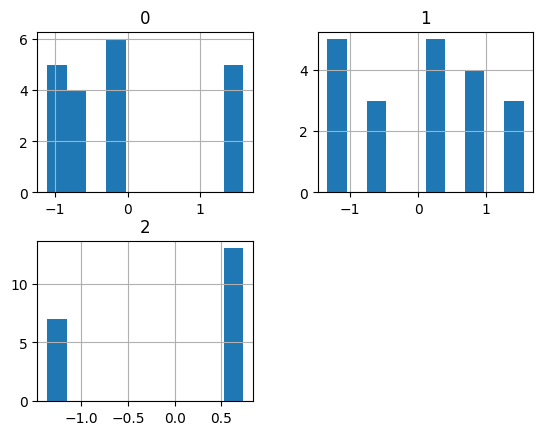

In [26]:
pd.DataFrame(X_train).hist()

<Axes: >

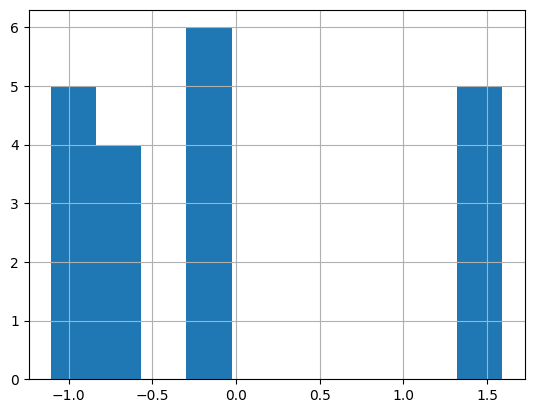

In [27]:
pd.DataFrame(X_train)[0].hist()

          0         1         2      3         4
0 -1.104083  0.828325 -1.362770  1.104  1.180821
1  1.588802  0.828325 -1.362770  1.785  1.916356
2 -1.104083  1.548607 -1.362770  1.134  1.183259
3  1.588802  1.548607 -1.362770  1.719  1.918793
4 -0.565506  1.548607 -1.362770  1.233  1.330365
5 -0.026929  0.828325 -1.362770  1.328  1.475035
6 -0.565506 -1.332522 -1.362770  1.199  1.320617
7 -0.565506 -0.612240 -1.362770  1.248  1.323054
8 -0.026929  0.108042 -1.362770  1.479  1.472598
9  1.588802  0.108042  0.733799  1.905  1.843630

RMSE: train: 0.06367995673795708 , valid: 0.10992270420588204 , test: 0.06230277748293102


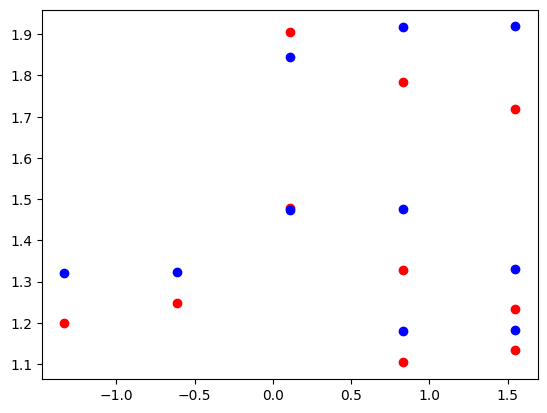

In [57]:
# try to train with different training models
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
#prediction
y_train_pred=lm.predict(X_train)
y_val_pred=lm.predict(X_val)
y_test_pred=lm.predict(X_test)

#visualisation
X_visual=X_val
Y_visual=y_val
Y_visual_pred =y_val_pred
pyplot.scatter(X_visual[:, 1], Y_visual, c="red")
pyplot.scatter(X_visual[:, 1], Y_visual_pred, c="blue")
lsit = merge_data(X_visual,Y_visual, Y_visual_pred)
print(pd.DataFrame(lsit))
print("\nRMSE:", 'train:', rmse(y_train_pred, y_train), ', valid:', rmse(y_val_pred, y_val),', test:', rmse(y_test_pred, y_test))


          0         1         2      3       4
0 -1.104083  0.828325 -1.362770  1.104  1.2547
1  1.588802  0.828325 -1.362770  1.785  1.5752
2 -1.104083  1.548607 -1.362770  1.134  1.2906
3  1.588802  1.548607 -1.362770  1.719  1.5715
4 -0.565506  1.548607 -1.362770  1.233  1.3419
5 -0.026929  0.828325 -1.362770  1.328  1.4044
6 -0.565506 -1.332522 -1.362770  1.199  1.4125
7 -0.565506 -0.612240 -1.362770  1.248  1.3664
8 -0.026929  0.108042 -1.362770  1.479  1.4598
9  1.588802  0.108042  0.733799  1.905  1.5684

RMSE: train: 0.18824054690740782 , valid: 0.17434779035020778 , test: 0.19616407163392596


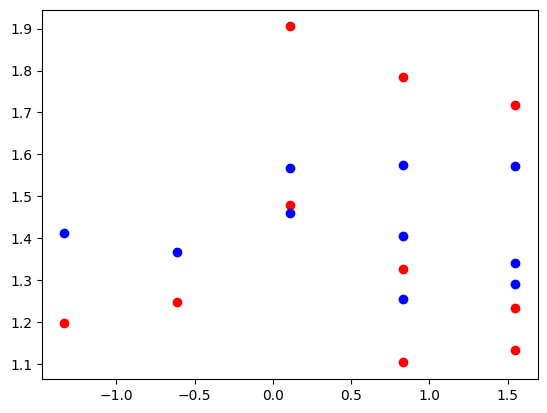

In [58]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
#prediction
y_train_pred=knn.predict(X_train)
y_val_pred=knn.predict(X_val)
y_test_pred=knn.predict(X_test)

#visualisation
X_visual=X_val
Y_visual=y_val
Y_visual_pred =y_val_pred
pyplot.scatter(X_visual[:, 1], Y_visual, c="red")
pyplot.scatter(X_visual[:, 1], Y_visual_pred, c="blue")
lsit = merge_data(X_visual,Y_visual, Y_visual_pred)
print(pd.DataFrame(lsit))
print("\nRMSE:", 'train:', rmse(y_train_pred, y_train), ', valid:', rmse(y_val_pred, y_val),', test:', rmse(y_test_pred, y_test))


          0         1         2      3         4
0 -1.104083  0.828325 -1.362770  1.104  1.147418
1  1.588802  0.828325 -1.362770  1.785  1.922857
2 -1.104083  1.548607 -1.362770  1.134  1.150867
3  1.588802  1.548607 -1.362770  1.719  1.893313
4 -0.565506  1.548607 -1.362770  1.233  1.295127
5 -0.026929  0.828325 -1.362770  1.328  1.439503
6 -0.565506 -1.332522 -1.362770  1.199  1.257487
7 -0.565506 -0.612240 -1.362770  1.248  1.243748
8 -0.026929  0.108042 -1.362770  1.479  1.452242
9  1.588802  0.108042  0.733799  1.905  1.863540

RMSE: train: 0.03506988910590026 , valid: 0.08586361674539518 , test: 0.06252428376159104


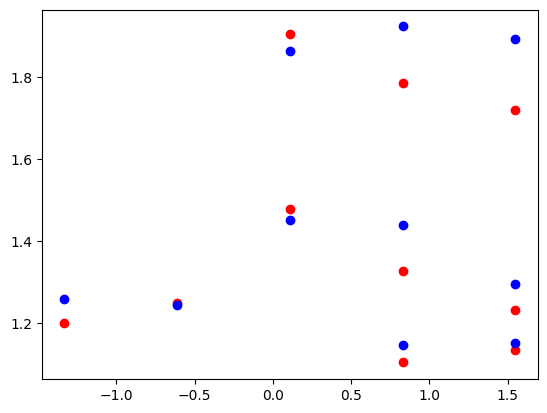

In [59]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10, n_estimators=1000).fit(X_train, y_train)
#prediction
y_train_pred=rfr.predict(X_train)
y_val_pred=rfr.predict(X_val)
y_test_pred=rfr.predict(X_test)

#visualisation
X_visual=X_val
Y_visual=y_val
Y_visual_pred =y_val_pred
pyplot.scatter(X_visual[:, 1], Y_visual, c="red")
pyplot.scatter(X_visual[:, 1], Y_visual_pred, c="blue")
lsit = merge_data(X_visual,Y_visual, Y_visual_pred)
print(pd.DataFrame(lsit))
print("\nRMSE:", 'train:', rmse(y_train_pred, y_train), ', valid:', rmse(y_val_pred, y_val),', test:', rmse(y_test_pred, y_test))


          0         1         2      3         4
0 -1.104083  0.828325 -1.362770  1.104  1.238800
1  1.588802  0.828325 -1.362770  1.785  1.764836
2 -1.104083  1.548607 -1.362770  1.134  1.238800
3  1.588802  1.548607 -1.362770  1.719  1.764836
4 -0.565506  1.548607 -1.362770  1.233  1.323888
5 -0.026929  0.828325 -1.362770  1.328  1.440609
6 -0.565506 -1.332522 -1.362770  1.199  1.330517
7 -0.565506 -0.612240 -1.362770  1.248  1.330517
8 -0.026929  0.108042 -1.362770  1.479  1.440609
9  1.588802  0.108042  0.733799  1.905  1.698589

RMSE: train: 0.11065225658366981 , valid: 0.10990367761586725 , test: 0.13701253749645487


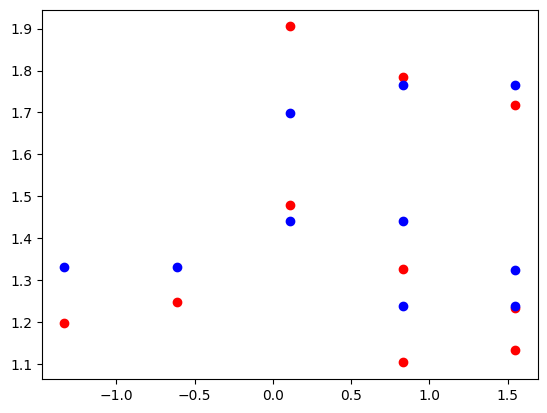

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1).fit(X_train, y_train)
#prediction
y_train_pred=gbr.predict(X_train)
y_val_pred=gbr.predict(X_val)
y_test_pred=gbr.predict(X_test)

#visualisation
X_visual=X_val
Y_visual=y_val
Y_visual_pred =y_val_pred
pyplot.scatter(X_visual[:, 1], Y_visual, c="red")
pyplot.scatter(X_visual[:, 1], Y_visual_pred, c="blue")
lsit = merge_data(X_visual,Y_visual, Y_visual_pred)
print(pd.DataFrame(lsit))
print("\nRMSE:", 'train:', rmse(y_train_pred, y_train), ', valid:', rmse(y_val_pred, y_val),', test:', rmse(y_test_pred, y_test))


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((3,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn.keras', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=300)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1573 - root_mean_squared_error: 1.0758 - val_loss: 0.3871 - val_root_mean_squared_error: 0.6222
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 0.8570 - root_mean_squared_error: 0.9258 - val_loss: 0.2078 - val_root_mean_squared_error: 0.4559
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.5779 - root_mean_squared_error: 0.7602 - val_loss: 0.1156 - val_root_mean_squared_error: 0.3400
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.3863 - root_mean_squared_error: 0.6215 - val_loss: 0.1357 - val_root_mean_squared_error: 0.3684
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 0.2824 - root_mean_squared_error: 0.5314 - val_loss: 0.1965 - val_root_mean_squared_error: 0.4432
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 0.2090 - root_mean_squared_error: 0.4572 - val_loss: 0.2135 - val_root_mean_squared_error: 0.4620
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.19

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
          0         1         2      3            4
0 -1.104083  0.828325 -1.362770  1.104  [1.1815715]
1  1.588802  0.828325 -1.362770  1.785  [1.8580818]
2 -1.104083  1.548607 -1.362770  1.134  [1.1902896]
3  1.588802  1.548607 -1.362770  1.719   [1.864506]
4 -0.565506  1.548607 -1.362770  1.233   [1.326948]
5 -0.026929  0.828325 -1.362770  1.328  [1.4548883]
6 -0.565506 -1.332522 -1.362770  1.199  [1.2920754]
7 -0.565506 -0.612240 -1.362770  1.248  [1.3007936]
8 -0.026929  0.108042 -1.362770  1.479  [1.4461703]
9  1.588802  0.108042  0.733799  1.905  [1.7993965]

RMSE: train: 0.07043611253060633 , valid: 0.09181817630478213 , test: 0.07684602303512071


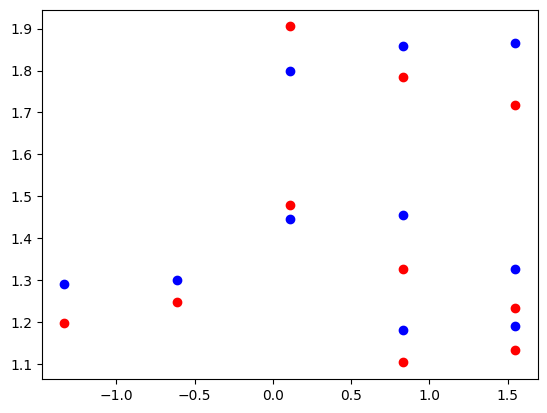

In [68]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn.keras')
#prediction
y_train_pred=simple_nn.predict(X_train)
y_val_pred=simple_nn.predict(X_val)
y_test_pred=simple_nn.predict(X_test)

#visualisation
X_visual=X_val
Y_visual=y_val
Y_visual_pred =y_val_pred
pyplot.scatter(X_visual[:, 1], Y_visual, c="red")
pyplot.scatter(X_visual[:, 1], Y_visual_pred, c="blue")
lsit = merge_data(X_visual,Y_visual, Y_visual_pred)
print(pd.DataFrame(lsit))
print("\nRMSE:", 'train:', rmse(y_train_pred, y_train), ', valid:', rmse(y_val_pred, y_val),', test:', rmse(y_test_pred, y_test))

In [29]:
medium_nn = Sequential()
medium_nn.add(InputLayer((3,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn.keras', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=300)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.5652 - root_mean_squared_error: 1.6016 - val_loss: 2.9551 - val_root_mean_squared_error: 1.7191
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 2.8394 - root_mean_squared_error: 1.6851 - val_loss: 0.2750 - val_root_mean_squared_error: 0.5244
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1934 - root_mean_squared_error: 0.4398 - val_loss: 0.3291 - val_root_mean_squared_error: 0.5736
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.4930 - root_mean_squared_error: 0.7021 - val_loss: 0.3554 - val_root_mean_squared_error: 0.5962
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - loss: 0.5842 - root_mean_squared_error: 0.7643 - val_loss: 0.2574 - val_root_mean_squared_error: 0.5073
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.4496 - root_mean_squared_error: 0.6706 - val_loss: 0.1610 - val_root_mean_squared_error: 0.4013
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 0.

In [ ]:
medium_nn = load_model('models/medium_nn.keras')
#prediction
y_train_pred=medium_nn.predict(X_train)
y_val_pred=medium_nn.predict(X_val)
y_test_pred=medium_nn.predict(X_test)

#visualisation
X_visual=X_val
Y_visual=y_val
Y_visual_pred =y_val_pred
pyplot.scatter(X_visual[:, 1], Y_visual, c="red")
pyplot.scatter(X_visual[:, 1], Y_visual_pred, c="blue")
lsit = merge_data(X_visual,Y_visual, Y_visual_pred)
print(pd.DataFrame(lsit))
print("\nRMSE:", 'train:', rmse(y_train_pred, y_train), ', valid:', rmse(y_val_pred, y_val),', test:', rmse(y_test_pred, y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


(0.06427364795946715, 0.11153006936582516)

In [72]:
large_nn = Sequential()
large_nn.add(InputLayer((3,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn.keras', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.1494 - root_mean_squared_error: 1.4661 - val_loss: 22298.4688 - val_root_mean_squared_error: 149.3267
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 24576.7285 - root_mean_squared_error: 156.7697 - val_loss: 0.2074 - val_root_mean_squared_error: 0.4554
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.1725 - root_mean_squared_error: 0.4154 - val_loss: 2.1758 - val_root_mean_squared_error: 1.4751
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 2.2433 - root_mean_squared_error: 1.4978 - val_loss: 2.2971 - val_root_mean_squared_error: 1.5156
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 2.3616 - root_mean_squared_error: 1.5368 - val_loss: 2.4128 - val_root_mean_squared_error: 1.5533
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 2.4784 - root_mean_squared_error: 1.5743 - val_loss: 2.5065 - val_root_mean_squared_error: 1.5832
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
          0         1         2      3            4
0 -1.104083  0.828325 -1.362770  1.104  [1.3267986]
1  1.588802  0.828325 -1.362770  1.785   [1.840675]
2 -1.104083  1.548607 -1.362770  1.134  [1.3092581]
3  1.588802  1.548607 -1.362770  1.719  [1.4115354]
4 -0.565506  1.548607 -1.362770  1.233  [1.5656205]
5 -0.026929  0.828325 -1.362770  1.328  [1.3012022]
6 -0.565506 -1.332522 -1.362770  1.199  [1.2438236]
7 -0.565506 -0.612240 -1.362770  1.248  [1.1141715]
8 -0.026929  0.108042 -1.362770  1.479  [1.0580808]
9  1.588802  0.108042  0.733799  1.905  [1.8220817]

RMSE: train: 0.009234192858428338 , valid: 0.22210605493248345 , test: 0.213652454929171


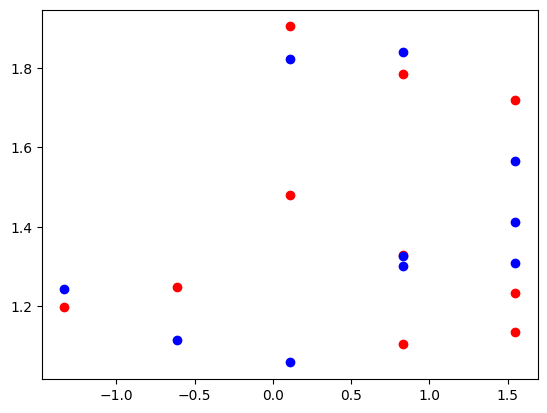

In [73]:
large_nn = load_model('models/large_nn.keras')
#prediction
y_train_pred=large_nn.predict(X_train)
y_val_pred=large_nn.predict(X_val)
y_test_pred=large_nn.predict(X_test)

#visualisation
X_visual=X_val
Y_visual=y_val
Y_visual_pred =y_val_pred
pyplot.scatter(X_visual[:, 1], Y_visual, c="red")
pyplot.scatter(X_visual[:, 1], Y_visual_pred, c="blue")
lsit = merge_data(X_visual,Y_visual, Y_visual_pred)
print(pd.DataFrame(lsit))
print("\nRMSE:", 'train:', rmse(y_train_pred, y_train), ', valid:', rmse(y_val_pred, y_val),', test:', rmse(y_test_pred, y_test))

In [ ]:
rmse(gbr.predict(X_test), y_test)

0.13701253749645487

In [74]:
larger_nn = Sequential()
larger_nn.add(InputLayer((3,)))
larger_nn.add(Dense(256, 'relu'))
larger_nn.add(Dense(128, 'relu'))
larger_nn.add(Dense(64, 'relu'))
larger_nn.add(Dense(32, 'relu'))
larger_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/larger_nn.keras', save_best_only=True)
larger_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
larger_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=300)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 2.4345 - root_mean_squared_error: 1.5603 - val_loss: 7507.0405 - val_root_mean_squared_error: 86.6432
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 6698.8530 - root_mean_squared_error: 81.8465 - val_loss: 0.4923 - val_root_mean_squared_error: 0.7017
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.6498 - root_mean_squared_error: 0.8061 - val_loss: 2.1133 - val_root_mean_squared_error: 1.4537
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 2.1662 - root_mean_squared_error: 1.4718 - val_loss: 2.0870 - val_root_mean_squared_error: 1.4447
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 2.1288 - root_mean_squared_error: 1.4590 - val_loss: 1.2753 - val_root_mean_squared_error: 1.1293
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 1.4642 - root_mean_squared_error: 1.2100 - val_loss: 3.6609 - val_root_mean_squared_error: 1.9133
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - 

In [ ]:
larger_nn = load_model('models/large_nn.keras')
#prediction
y_train_pred=larger_nn.predict(X_train)
y_val_pred=larger_nn.predict(X_val)
y_test_pred=larger_nn.predict(X_test)

#visualisation
X_visual=X_val
Y_visual=y_val
Y_visual_pred =y_val_pred
pyplot.scatter(X_visual[:, 1], Y_visual, c="red")
pyplot.scatter(X_visual[:, 1], Y_visual_pred, c="blue")
lsit = merge_data(X_visual,Y_visual, Y_visual_pred)
print(pd.DataFrame(lsit))
print("\nRMSE:", 'train:', rmse(y_train_pred, y_train), ', valid:', rmse(y_val_pred, y_val),', test:', rmse(y_test_pred, y_test))